##Neural Network

In [0]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [0]:
data = pd.read_csv('All India Air Quality Data.csv',encoding='cp1252')                                                                                                                         

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(data.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [0]:
encoder = preprocessing.LabelEncoder()
regressor = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [0]:
data = data.fillna(np.nan,axis=0)


data['stn_code'] = encoder.fit_transform(data['stn_code'].astype(str))
data['state'] = encoder.fit_transform(data['state'])
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['type'] = encoder.fit_transform(data['type'].astype(str))
data['location_monitoring_station'] = encoder.fit_transform(data['location_monitoring_station'].astype(str))

data['so2'] = data['so2'].fillna(np.mean(data['so2']),axis=0)
data['no2'] = data['no2'].fillna(np.mean(data['no2']),axis=0)
data['rspm'] = data['rspm'].fillna(np.mean(data['rspm']),axis=0)
data['spm'] = data['spm'].fillna(np.mean(data['spm']),axis=0)
data['pm2_5'] = data['pm2_5'].fillna(np.mean(data['pm2_5']),axis=0)

In [0]:
X1 = data[['stn_code','state','location','type','location_monitoring_station','date']]
Y1 = data['pm2_5']

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1,test_size=0.2,random_state=0)

Y_train1, Y_test1 = np.array(Y_train1).reshape(-1,1),np.array(Y_test1).reshape(-1,1)

In [0]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([tf.keras.layers.Dense(1024,activation='relu',input_dim=6),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(1)])

model.compile(optimizer=RMSprop(lr=0.1),loss='mean_squared_error',metrics=['mean_absolute_error'])

In [0]:

history = model.fit(X_train1, # Features
                      Y_train1, # Target
                      epochs=50, # Number of epochs
                      verbose=1, # No output
                      batch_size=10000, # Number of observations per batch
                      validation_data=(X_test1, Y_test1))

Train on 348593 samples, validate on 87149 samples
Epoch 1/50
348593/348593 [==============================] - 1s 3us/sample - loss: 7040581305883622899712.0000 - mean_absolute_error: 37871886336.0000 - val_loss: 201696557155878240.0000 - val_mean_absolute_error: 448911296.0000
Epoch 2/50
348593/348593 [==============================] - 1s 2us/sample - loss: 1683252306983324928.0000 - mean_absolute_error: 739343232.0000 - val_loss: 42285243552825424.0000 - val_mean_absolute_error: 205630864.0000
Epoch 3/50
348593/348593 [==============================] - 1s 2us/sample - loss: 262804298383653408.0000 - mean_absolute_error: 269406016.0000 - val_loss: 7853512658110805.0000 - val_mean_absolute_error: 88618784.0000
Epoch 4/50
348593/348593 [==============================] - 1s 2us/sample - loss: 66261661299282672.0000 - mean_absolute_error: 111964296.0000 - val_loss: 1209950258907553.2500 - val_mean_absolute_error: 34783788.0000
Epoch 5/50
348593/348593 [==============================] - 1s

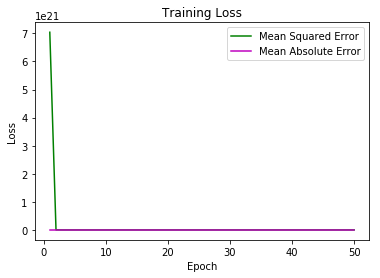

In [0]:
import matplotlib.pyplot as plt

# Get training and test loss histories
ma = history.history['loss']
ma1 = history.history['mean_absolute_error']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.title('Training Loss')
plt.plot(epoch_count, ma, 'g')
plt.plot(epoch_count, ma1, 'm')
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

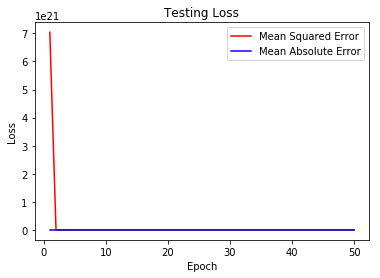

In [0]:
test_loss = history.history['val_loss']
ma1 = history.history['val_mean_absolute_error']
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.title('Testing Loss')
plt.plot(epoch_count, ma, 'r')
plt.plot(epoch_count, ma1, 'b')
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();